## Medical Cost Personal Datasets

Kaggle üzerinden aldığım bu veri setinde düzenlemeler yaptıktan sonra regresyon modeli oluşturacağım

In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [490]:
data = pd.read_csv('insurance.csv')

In [492]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veriyi incelediğimde herhangi bir eksik veri göremedim. Fakat düzeltilmesi gereken kategorik veriler var.

In [498]:
from sklearn.preprocessing import LabelEncoder

In [500]:
labelEncoder = LabelEncoder()

In [504]:
data["sex"] = labelEncoder.fit_transform(data["sex"])

In [506]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [508]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [512]:
data["smoker"] = labelEncoder.fit_transform(data["smoker"])

In [514]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Cinsiyet ve sigara kolonunda Label Encoder işlemi yaparak korelasyona uygun kolonlar elde ettim.

In [516]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Bölge kolonunda çeşit sayısı az olduğundan düzeltme yapılabilir. Model için önemli olabilir.

In [520]:
data = pd.get_dummies(data,columns=["region"])

In [522]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


Öncelikle get_dummies() fonksiyonuyla true,false durumuna getirdim.

In [532]:
data["region_northeast"] = labelEncoder.fit_transform(data["region_northeast"])
data["region_northwest"] = labelEncoder.fit_transform(data["region_northwest"])
data["region_southeast"] = labelEncoder.fit_transform(data["region_southeast"])
data["region_southwest"] = labelEncoder.fit_transform(data["region_southwest"])

Daha sonra Label Encoder ile 1,0 değerlerini atadım

In [534]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [536]:
data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


Artık veri setim model oluşturulmaya hazır.

## TRAIN - TEST SPLIT

In [552]:
X = data[["age","sex","bmi","children","smoker","region_northeast","region_northwest","region_southeast","region_southwest"]]
y = data["charges"]

In [554]:
from sklearn.model_selection import train_test_split

In [556]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 15)

## SCALE

In [558]:
from sklearn.preprocessing import StandardScaler

In [562]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TRAINING

In [564]:
from sklearn.linear_model import LinearRegression

In [566]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [568]:
newData = [[20,1,17.000,2,1,1,0,0,0]]
newData_scaled = scaler.transform(newData)

C:\Users\YUSUF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [570]:
reg.predict(newData)

array([134217.97893721])

Eğitim tamamlandıktan sonra rastgele değerler ile tahmin yaptım. Sırada ne kadar doğru olduğunu görmek var.

In [574]:
y_pred_test = reg.predict(X_test_scaled)

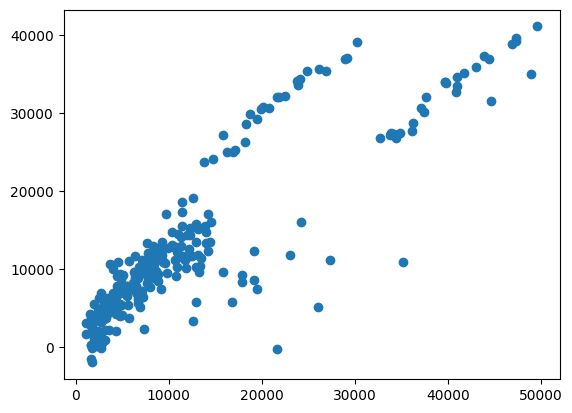

In [576]:
plt.scatter(y_test,y_pred_test)
plt.show()

Başarı kriterlerine geçmeden önce grafik ile yorumlamaya çalıştım. Çoğunluk olarak istenilene ulaşılmış fakat hata payım var gibi görünüyor

In [578]:
from sklearn.metrics import r2_score

r2_score, mae ve mse'den daha anlamlı sonuç ürettiğinden onu kullandım.

In [580]:
r2score = r2_score(y_test,y_pred_test)

In [582]:
print("r2score: ", r2score)

r2score:  0.7709928565663494


## Genel Çıkarım ve Özet

Veri setimde düzeltilmesi gereken alanlar vardı. Feature Engineerin mantıgında bunları korelasyona uygun hale getirdim. Daha sonrasında modelimi oluşturdum. Modelim %77lik doğruluk payına sahip. Bunun sebebi encoder işlemleri olabilir. Encoder, istediğimiz uygun hale getirmek için yaptığımız feature engineering işlemleridir. Belki modelimiz yüksek doğruluk payına sahip değil ama en azından anlamlı değerler üretebiliyor. Eğer kategorik olmayan verileri dışarı atsaydık çok yanlış sonuçlarla karşılaşabilirdik.